In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Define a function to resize images while preserving aspect ratio
def resize_with_pad(image):
    if image.shape[0] == image.shape[1]:  # Check if width equals height
        image = tf.image.resize_with_crop_or_pad(image, 224, 224)
        return image
    else:
        return None 
    
# Create ImageDataGenerator with resizing and other preprocessing steps
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization=True,
    validation_split=0.3,
    preprocessing_function=resize_with_pad  # Add resizing function here
)

# Example usage:
train_generator = datagen.flow_from_directory(
    directory='data/Training Images',
    target_size=(224, 224),  # This will be ignored due to preprocessing_function
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    directory='data/Training Images',
    target_size=(224, 224),  # This will be ignored due to preprocessing_function
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

train_generator.class_indices

Found 2368 images belonging to 3 classes.
Found 1013 images belonging to 3 classes.


{'Dry': 0, 'Normal': 1, 'Wet': 2}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


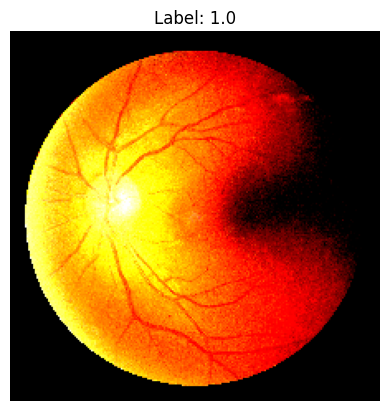

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


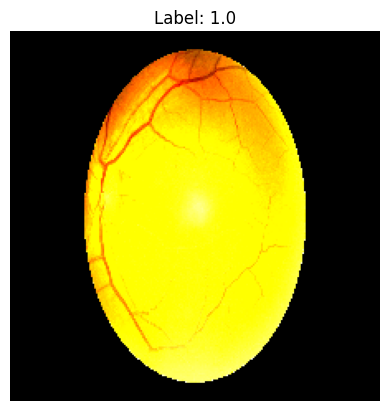

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


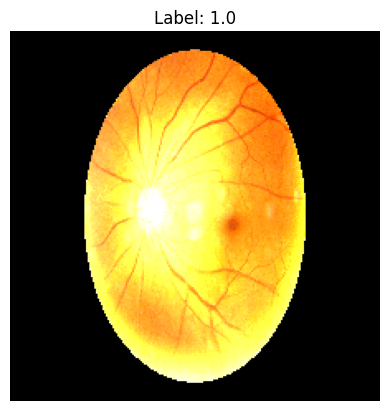

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


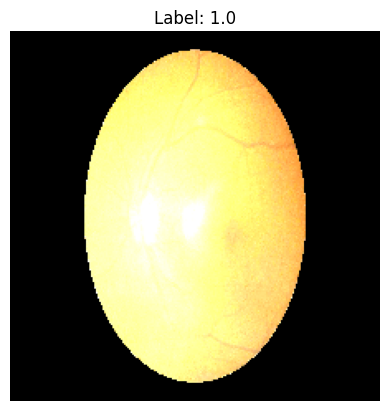

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


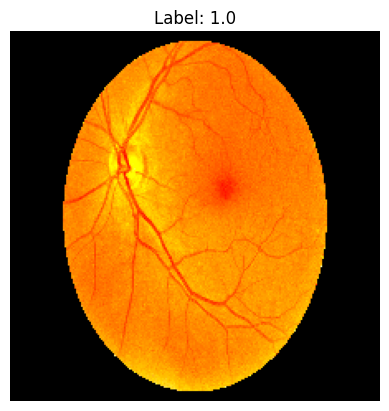

In [12]:
import matplotlib.pyplot as plt

# Retrieve a batch of images and labels from the train_generator
images, labels = next(train_generator)

# Display the first few images along with their labels
num_images_to_display = 5
for i in range(num_images_to_display):
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")  # Assuming binary classification
    plt.axis('off')  # Hide axes
    plt.show()

In [23]:
def preprocess_image(image_path):
    # Load image
    img = load_img(image_path)
    img_array = img_to_array(img)
    
    # Resize without maintaining aspect ratio
    resized_img = tf.image.resize(img_array, [500, 500])
    
    # Center crop
    crop_size = 500
    height, width = resized_img.shape[:2]
    crop_height, crop_width = min(crop_size, height), min(crop_size, width)
    cropped_img = tf.image.crop_to_bounding_box(resized_img, (height - crop_height) // 2, (width - crop_width) // 2, crop_height, crop_width)
    
    return cropped_img

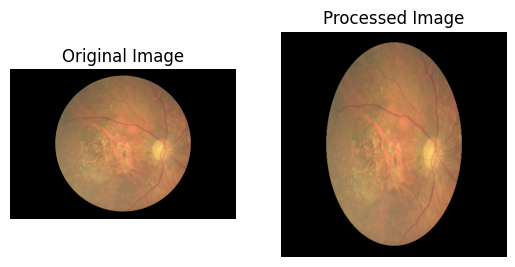

In [16]:
image_path = "dataset/train/Dry/43_right.jpg"

import matplotlib.pyplot as plt

# Load original image
original_image = load_img(image_path)
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original_image)
plt.axis('off')

# Preprocess image
processed_image = preprocess_image(image_path)
plt.subplot(1, 2, 2)
plt.title('Processed Image')
plt.imshow(processed_image.numpy().astype(np.uint8))
plt.axis('off')

plt.show()


In [2]:
from PIL import Image

def resize_image(image_path, output_size):
    # Open the image
    original_image = Image.open(image_path)

    # Get the original image size
    original_width, original_height = original_image.size

    # Determine whether to crop or pad based on aspect ratio
    if original_width / original_height > 1:
        # Original image is wider than tall, so crop
        left = (original_width - original_height) / 2
        top = 0
        right = (original_width + original_height) / 2
        bottom = original_height
        cropped_image = original_image.crop((left, top, right, bottom))
    elif original_width / original_height < 1:
        # Original image is taller than wide, so pad
        padded_image = Image.new(original_image.mode, (original_height, original_height), color='white')
        padded_image.paste(original_image, ((original_height - original_width) // 2, 0))
        cropped_image = padded_image
    else:
        # Original image is already square, no need to resize
        cropped_image = original_image

    # Resize the image to the output size
    resized_image = cropped_image.resize(output_size, Image.Resampling.LANCZOS)

    return resized_image

In [3]:
import os

# Function to process images in a directory and its subdirectories
def process_images_in_directory(directory_path, output_size):
    # Iterate through all files and subdirectories in the directory
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            # Check if the file is an image file (you can add more image formats if needed)
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                # Get the full path of the image file
                image_path = os.path.join(root, file)
                
                # Resize the image
                resized_image = resize_image(image_path, output_size)
                
                # Save the resized image, overwriting the original file
                resized_image.save(image_path)
                print(f"Resized and replaced: {image_path}")

# Define the directory containing images
directory_path = "data/binary"

# Define the desired output size
output_size = (500, 500)

# Process images in the directory and its subdirectories
process_images_in_directory(directory_path, output_size)

Resized and replaced: data/binary\Disease\0_1kIM_10_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_11_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_13_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_14_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_15_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_16_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_17_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_18_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_19_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_1_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_20_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_22_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_23_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_24_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_25_ARMD.png
Resized and replaced: data/binary\Disease\0_1kIM_26_ARMD.png
Resized and replaced: dat